# Customer Churn Prediction for Telecommunications Company

##### Client Name: CommLink Telecom
##### Company Name: DataSense Solutions

**Description:** CommLink Telecom, a telecommunications company, is facing high customer churn rates and wants to address the issue proactively. They have engaged DataSense Solutions to build a customer churn prediction model that can identify customers likely to churn in the near future. This will enable them to take targeted retention measures and improve customer retention rates.

**Dataset:**

| CustomerID | Gender | Age | ServiceLength (months) | ContractType | MonthlyCharges (USD) | TotalCharges (USD) | Churn |
|------------|--------|-----|-----------------------|--------------|---------------------|--------------------|-------|
| 1001 | Male | 42 | 24 | Two-Year | 85.00 | 2040.00 | No |
| 1002 | Female | 35 | 12 | One-Year | 79.50 | 942.50 | Yes |
| 1003 | Male | 62 | 48 | Month-to-Month | 94.20 | 4567.75 | Yes |
| 1004 | Female | 52 | 36 | One-Year | 78.25 | 2853.50 | No |
| 1005 | Male | 28 | 6 | Month-to-Month | 68.75 | 452.25 | No |
| ... | ... | ... | ... | ... | ... | ... | ... |

(Note: The dataset contains a total of 1000 customers with some churned (Yes) and others active (No).)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate Dataset

In [193]:
data_size = 1000
np.random.seed(42)

srv_length = np.random.randint(1, 50, data_size)
monthly_charges = np.random.uniform(20, 100, size=1000)

# more realistic distribution of churn
churn_probabilities = [0.4, 0.6]
churn = np.random.choice(['Yes', 'No'], size=data_size, p=churn_probabilities)

data = {
    'CustomerID': list(range(1001, 2001)),
    'Gender': np.random.choice(['Male', 'Female'], size=data_size),
    'Age': np.random.randint(18, 70, data_size),
    'ServiceLength (months)': srv_length,
    'ContractType': np.random.choice(['Two-Year', 'One-Year', 'Month-to-Month'], size=data_size),
    'MonthlyCharges (USD)': monthly_charges,
    'TotalCharges (USD)': srv_length * monthly_charges * 0.9,
    'Churn': churn
}

df = pd.DataFrame(data)


In [194]:
df.head()

,CustomerID,Gender,Age,ServiceLength (months),ContractType,MonthlyCharges (USD),TotalCharges (USD),Churn
0,1001,Male,66,39,Two-Year,75.756917,2659.067786,Yes
1,1002,Female,27,29,Month-to-Month,99.780443,2604.269557,No
2,1003,Male,45,15,Two-Year,91.728821,1238.339084,Yes
3,1004,Male,38,43,Two-Year,66.079873,2557.291102,Yes
4,1005,Male,67,8,Two-Year,93.391649,672.419873,Yes


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1000 non-null   int64  
 1   Gender                  1000 non-null   object 
 2   Age                     1000 non-null   int32  
 3   ServiceLength (months)  1000 non-null   int32  
 4   ContractType            1000 non-null   object 
 5   MonthlyCharges (USD)    1000 non-null   float64
 6   TotalCharges (USD)      1000 non-null   float64
 7   Churn                   1000 non-null   object 
dtypes: float64(2), int32(2), int64(1), object(3)
memory usage: 54.8+ KB


In [196]:
df.describe()

,CustomerID,Age,ServiceLength (months),MonthlyCharges (USD),TotalCharges (USD)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1500.500000,43.947000,25.379000,60.812403,1374.978457
std,288.819436,14.853984,14.122138,22.597415,960.461013
min,1001.000000,18.000000,1.000000,20.019002,18.074123
25%,1250.750000,32.000000,13.000000,41.524641,564.412028
50%,1500.500000,44.000000,26.000000,62.128091,1205.314557
75%,1750.250000,57.000000,37.000000,79.855529,1944.868429
max,2000.000000,69.000000,49.000000,99.948280,4295.379738


In [197]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
ServiceLength (months)    0
ContractType              0
MonthlyCharges (USD)      0
TotalCharges (USD)        0
Churn                     0
dtype: int64

# Visualizationa

<Axes: xlabel='Gender', ylabel='count'>

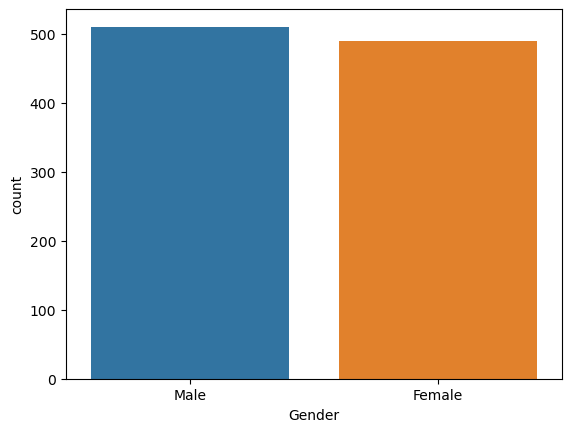

In [198]:
sns.countplot(data=df, x='Gender')

<Axes: ylabel='count'>

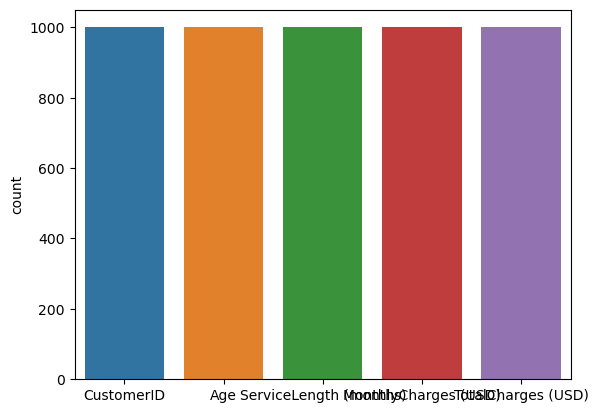

In [199]:
sns.countplot(data=df)

<Axes: xlabel='ContractType', ylabel='Count'>

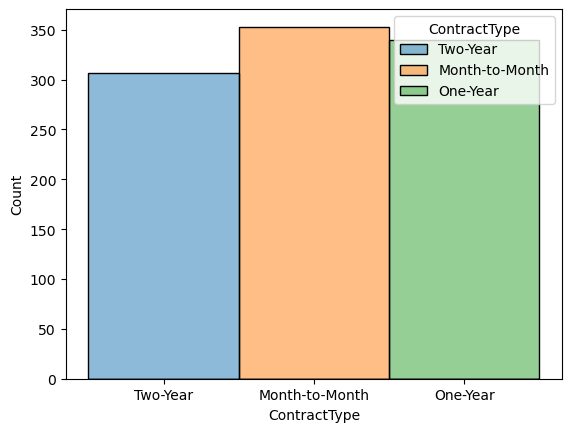

In [200]:
sns.histplot(data=df, x='ContractType', hue='ContractType')

<Axes: xlabel='Age', ylabel='TotalCharges (USD)'>

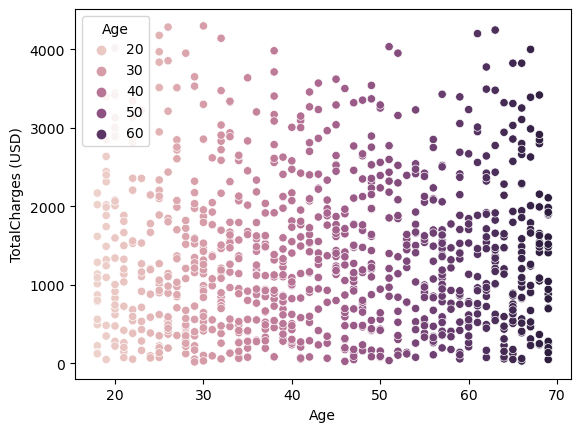

In [201]:
sns.scatterplot(data=df, x='Age', y='TotalCharges (USD)', hue='Age')

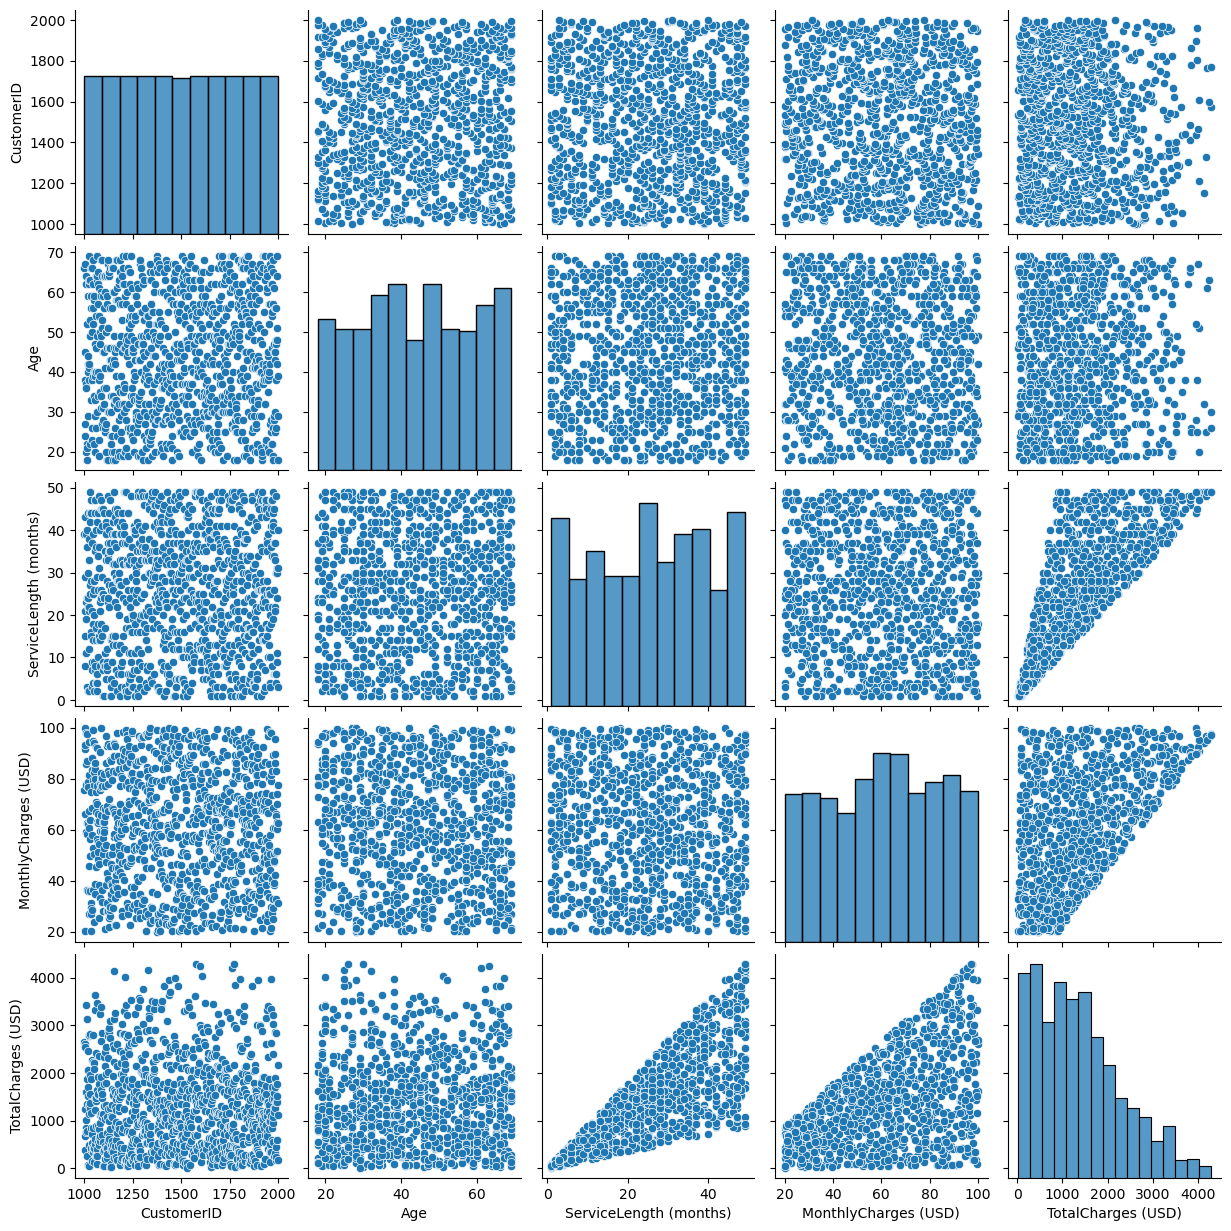

In [202]:
sns.pairplot(df)

# Data Cleaning

In [203]:
df

,CustomerID,Gender,Age,ServiceLength (months),ContractType,MonthlyCharges (USD),TotalCharges (USD),Churn
0,1001,Male,66,39,Two-Year,75.756917,2659.067786,Yes
1,1002,Female,27,29,Month-to-Month,99.780443,2604.269557,No
2,1003,Male,45,15,Two-Year,91.728821,1238.339084,Yes
3,1004,Male,38,43,Two-Year,66.079873,2557.291102,Yes
4,1005,Male,67,8,Two-Year,93.391649,672.419873,Yes
...,...,...,...,...,...,...,...,...
995,1996,Female,69,24,Month-to-Month,70.236004,1517.097691,No
996,1997,Male,42,9,One-Year,73.944305,598.948867,Yes
997,1998,Female,29,3,Two-Year,62.598495,169.015938,No
998,1999,Male,18,31,Month-to-Month,77.713765,2168.214054,No


In [204]:
# gender to numeric/reference numbers
gender = pd.get_dummies(data=df['Gender'], drop_first=True)

# contractType to numeric/reference numbers
contractType = pd.get_dummies(data=df['ContractType'])

# Churn to numeric/reference numbers
churn = pd.get_dummies(df['Churn'], drop_first=True)
churn.columns=['Churn_Status']

In [205]:
df = pd.concat([df, churn, gender, contractType], axis=1)
df.head()

,CustomerID,Gender,Age,ServiceLength (months),ContractType,MonthlyCharges (USD),TotalCharges (USD),Churn,Churn_Status,Male,Month-to-Month,One-Year,Two-Year
0,1001,Male,66,39,Two-Year,75.756917,2659.067786,Yes,1,1,0,0,1
1,1002,Female,27,29,Month-to-Month,99.780443,2604.269557,No,0,0,1,0,0
2,1003,Male,45,15,Two-Year,91.728821,1238.339084,Yes,1,1,0,0,1
3,1004,Male,38,43,Two-Year,66.079873,2557.291102,Yes,1,1,0,0,1
4,1005,Male,67,8,Two-Year,93.391649,672.419873,Yes,1,1,0,0,1


In [206]:
# delete string/unnecessary columns as they are not needed
df.drop(columns=['CustomerID', 'Gender', 'ContractType', 'Churn'], inplace=True)

In [207]:
df.head()

,Age,ServiceLength (months),MonthlyCharges (USD),TotalCharges (USD),Churn_Status,Male,Month-to-Month,One-Year,Two-Year
0,66,39,75.756917,2659.067786,1,1,0,0,1
1,27,29,99.780443,2604.269557,0,0,1,0,0
2,45,15,91.728821,1238.339084,1,1,0,0,1
3,38,43,66.079873,2557.291102,1,1,0,0,1
4,67,8,93.391649,672.419873,1,1,0,0,1


# Data Splitting

In [208]:
# INDEPENDENT/FEATURES and LABELS/DEPENDENT VARIABLES/COLS
X = df.drop('Churn_Status', axis=1)
y = df['Churn_Status']

In [219]:
# SPLITTING DATA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Logistic Regression

In [224]:
# CREATE MODEL AND TRAIN
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [225]:
# PREDICT
predictions = log_model.predict(X_test)

In [226]:
# EVALUATION
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.99      0.76       153
           1       0.33      0.01      0.02        97

    accuracy                           0.61       250
   macro avg       0.47      0.50      0.39       250
weighted avg       0.50      0.61      0.47       250



In [227]:
confusion_matrix(y_test, predictions)

array([[151,   2],
       [ 96,   1]], dtype=int64)

# Random Forest

In [228]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X, y)

RandomForestClassifier()

In [229]:
predictions = rf_model.predict(X_test)

In [231]:
confusion_matrix(y_test, predictions)

array([[153,   0],
       [  0,  97]], dtype=int64)

In [232]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00        97

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



# TESTING MODELS

In [251]:
test_data = {
    'Age': 45,
    'ServiceLength (months)': 30,
    'MonthlyCharges (USD)': 60,
    'TotalCharges (USD)': 30 * 60,
    'Male': 0,
    'Month-to-Month': 0,
    'One-Year': 1,
    'Two-Year': 0
}


test_df = pd.DataFrame([test_data])
test_df

,Age,ServiceLength (months),MonthlyCharges (USD),TotalCharges (USD),Male,Month-to-Month,One-Year,Two-Year
0,45,30,60,1800,0,0,1,0


In [252]:
def check_churn_status(val):
    if val==0:
        print("Customers is NOT expected to churn")
    elif val==1:
        print("Customers is expected to churn")

In [253]:
# LOGISTIC REGRESSION TEST
churn_prediction_lr_model = log_model.predict(test_df)

print("Logistic Model Result\n")
check_churn_status(churn_prediction_lr_model[0])

Logistic Model Result

Customers is NOT expected to churn


In [254]:
# RANDOM FOREST CALSSIFICATION TEST
churn_prediction_rf_model = rf_model.predict(test_df)

print("RANDOM FOREST CALSSIFICATION Model Result\n")
check_churn_status(churn_prediction_rf_model[0])

RANDOM FOREST CALSSIFICATION Model Result

Customers is NOT expected to churn
